In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [12]:
from datetime import date

dateFilter = dt.datetime(2016, date.today().month, date.today().day)
dateFilter

datetime.datetime(2016, 8, 30, 0, 0)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
# Calculate the date 1 year ago from the last data point in the database

maxDate = session.query(func.max(measurement.date)).one()

fromDate = dt.datetime.strptime(maxDate[0], '%Y-%m-%d')
py = fromDate.year -1
dateFilter = dt.datetime(py, fromDate.month, fromDate.day)
dateFilter

datetime.datetime(2016, 8, 23, 0, 0)

In [15]:
sel =[measurement.id,measurement.station,measurement.date,measurement.prcp,measurement.tobs]
results = session.query(*sel).\
filter(measurement.date >= dateFilter).\
all()
results

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'USC00519397', '2016-09-12', 0.0, 78.0),
 (2385, 'U

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df = pd.DataFrame(results, columns=['id', 'station', 'date','prcp','tobs'])
df.set_index("date",inplace=True)
df
df["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [17]:
df.sort_values(by=['date'])


id      station  prcp  tobs
date                                      
2016-08-24   2365  USC00519397  0.08  79.0
2016-08-24   8826  USC00517948   NaN  78.0
2016-08-24  14609  USC00519281  2.15  77.0
2016-08-24   7332  USC00514830  2.28  80.0
2016-08-24   5092  USC00513117  2.15  76.0
...           ...          ...   ...   ...
2017-08-22  12186  USC00519523  0.00  82.0
2017-08-23  12187  USC00519523  0.08  82.0
2017-08-23   2724  USC00519397  0.00  81.0
2017-08-23   7635  USC00514830  0.00  82.0
2017-08-23  19550  USC00516128  0.45  76.0

[2223 rows x 4 columns]

Text(0.5, 0, 'Date ')

<Figure size 432x288 with 0 Axes>

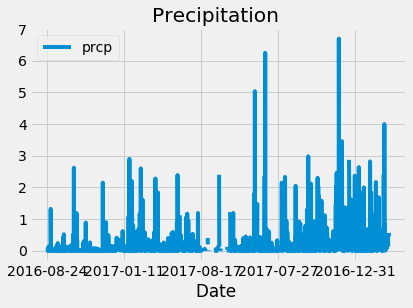

In [18]:
plt.figure()
df.plot(y="prcp")
plt.title("Precipitation ")
plt.xlabel("Date ")



In [19]:
# Design a query to show how many stations are available in this dataset?
availStations = session.query(measurement.station).\
    group_by(measurement.station).\
    order_by(measurement.station).all()
print("Estaciones Diponibles:")
for x in range(len(availStations)):
    print(availStations[x][0])

Estaciones Diponibles:
USC00511918
USC00513117
USC00514830
USC00516128
USC00517948
USC00518838
USC00519281
USC00519397
USC00519523


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
mostActive =session.query(measurement.station,func.count(measurement.station)).\
        group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()
mostActive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station=mostActive[0][0]
results =session.query( "Station:" + measurement.station,"Min:" + func.min(measurement.prcp),"Max:" + func.max(measurement.prcp),"Avg:" +func.avg(measurement.prcp)).\
        filter(measurement.station == station).\
        group_by(measurement.station).\
       all()
results

[('Station:USC00519281', 0.0, 9.64, 'Avg:0.212352092352091')]

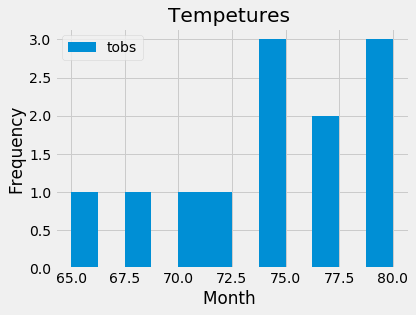

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station=mostActive[0][0]
results =session.query( func.strftime("%m", measurement.date),measurement.tobs).\
        filter(measurement.station == station).\
        filter(measurement.date >= dateFilter).group_by(func.strftime("%m", measurement.date)).all()

df = pd.DataFrame(results, columns=['date', 'tobs'])
df.set_index('date', inplace=True)
df.plot.hist(bins=12)

plt.tight_layout()
plt.title("Tempetures ")
plt.xlabel("Month ")
plt.show()
